# Part II - Ford GoBike System Data Exploration
## by Ibrahima Diogoye Diouf

## Investigation Overview
In this investigation, I wanted to look at the time of the day and day of the week that most trips are taken, how long does the average trip take and see if the results of the ealier investigations depend on if a user is a subscriber or a customer.

## Dataset Overview

Upon proper data preparation for exploration, the dataset contains 183,412 rows and 12 columns:

start_time (datetime).

start_station_name (object)

bike_id(int)

end_station_name (object)

user_type (categorical) - Subscriber and Customer.

member_gender (categorical) - Male, Female and Other

bike_share_for_all_trip

Also, new columns were created:


day_of_week: to store week day number from start_time.

start_hour: to store hour number from start_time.

time_of_day: to store the time of the day from 
start_hour

duration_min: to store the duration in minutes.

distance :to store the distance



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings


warnings.simplefilter("ignore")

In [2]:

# load in the dataset into a pandas dataframe
df = pd.read_csv('clean-fordgobike-tripdata.csv')

#### Most trips taken in terms of day of the week
The day of the week with the most trips is Thursday followed by Tuesday and wednesday.


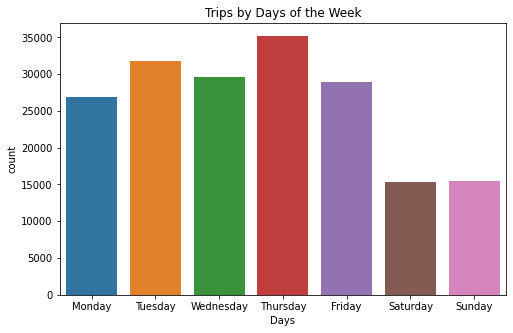

In [3]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'day_of_week', order=weekday)
plt.title('Trips by Days of the Week')
plt.xlabel('Days')
plt.show();

#### Most trips taken in terms of time of day


The time of the day with the most trips is Afternoon (12:00 - 17:59 hours of the day) followed by Morning (00:00 - 11:59 hours of the day) with a very little difference from the afternoon.

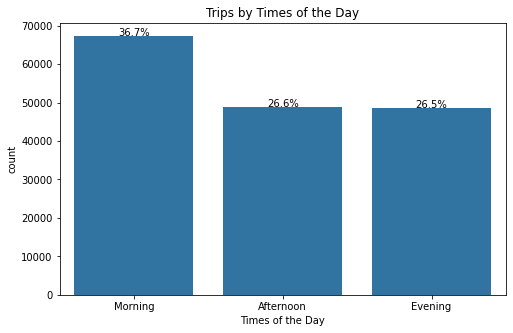

In [4]:
# plot distribution of day of week
time_of_day =['Morning','Afternoon','Evening']
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'time_of_day', color = base_color, order=time_of_day)
n_points = df.shape[0]
user_counts = df['time_of_day'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trips by Times of the Day')
plt.xlabel('Times of the Day')
plt.show();

##### Distribution of Duration
Most rides took about (9-12) minutes. And very few rides lasted more than one hour (60 minutes). After standardizing by converted from second to minute and then plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.

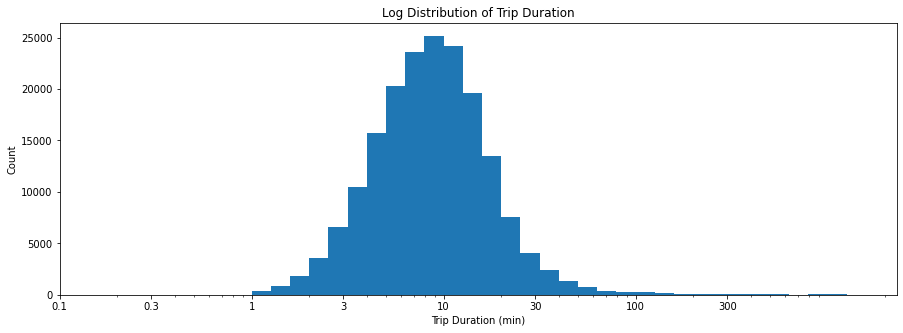

In [5]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
plt.title('Log Distribution of Trip Duration')
plt.show();

#### Does the time of the day that most trips are taken dependent on if a user is a subscriber or a customer?
The time of the day that most trips are taken (Afternoon and Morning) is slightly dependent on if a user is a subscriber or a customer. It was realized that Customers often start the trip in the afternoon where as Subscribers mostly start the trip in the morning.

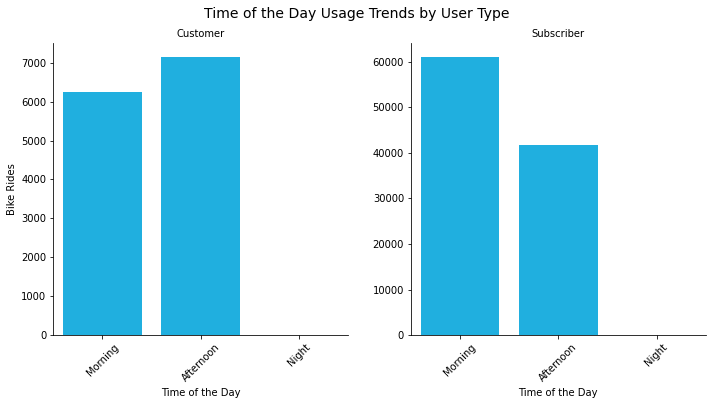

In [6]:
day_time = ['Morning', 'Afternoon', 'Night']
g = sb.catplot(data=df, x='time_of_day', col="user_type", kind='count', sharey = False, color = 'deepskyblue', order = day_time)
g.set_axis_labels("Time of the Day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Time of the Day Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

### Does the day of the week that most trips are taken dependent on if a user is a subscriber or a customer?

The day of the week that most trips are taken (Thursday) is NOT dependent on if a user is a subscriber or a customer. It was discovered that Customers often use the service during weekends where as Subscribers mostly use the service during regular weekdays from Monday to Friday.

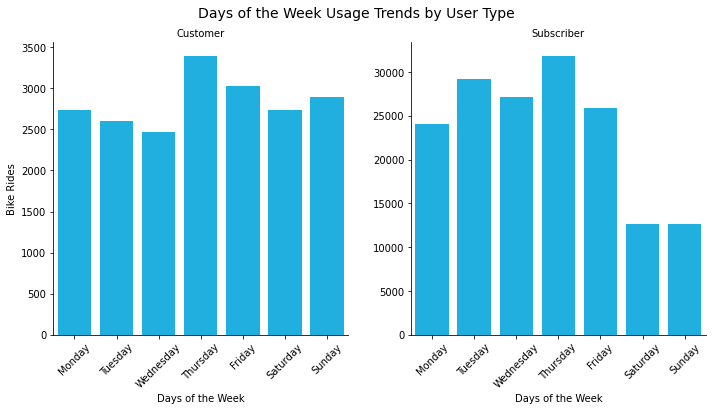

In [7]:
g = sb.catplot(data=df, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

#### Does the average trip duration taken dependent on if a user is a subscriber or a customer?
The average trip duration IS highly dependent on if a user is a subscriber or just a customer. On average, Customers (24 minutes) have two times trip duration lenght of subscribers (10 minutes) i.e. Subscriber users tend to ride the bikes in lesser duration than customer users



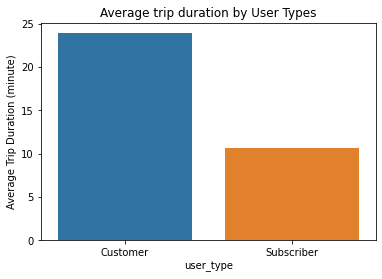

In [8]:
# Average trip duration mean plot
grouped_user_type_duration = df[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
sb.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show();

#### Rides by different user types

From our investigation its clearly evident that almost 79% of the rides are taken by the Subscribers and the rest 21% by Customers (one time users). The same trend is observed on different days of the week.

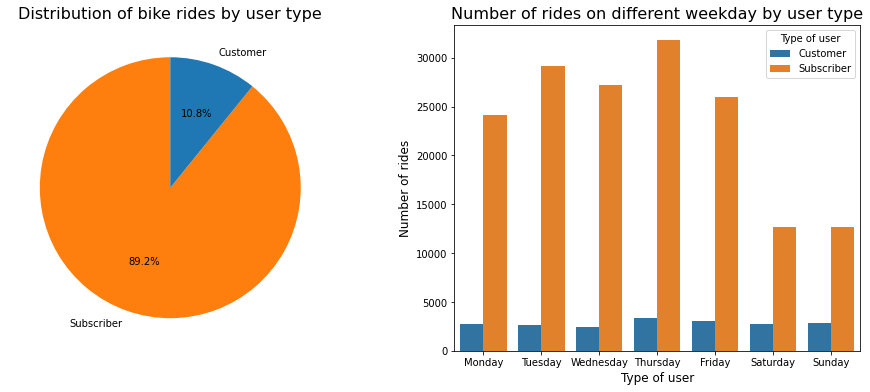

In [9]:
# plot a graph to see how different user types ride each day of week
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

current_palette = sb.color_palette()
plt.figure(figsize=[16, 6])
plt.subplot(1,2,1)
df.user_type.value_counts().plot.pie(autopct='%1.1f%%', startangle=90,colors = [current_palette[1],current_palette[0]])
plt.title('Distribution of bike rides by user type', fontsize=16)
plt.ylabel('')

plt.subplot(1,2,2)
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type', order=weekday)
plt.xlabel('Type of user', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides on different weekday by user type', fontsize=16)
plt.legend(title = 'Type of user');

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 732367 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/home/ibrahima/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/home/ibrahima/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/home/ibrahima/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/ibrahima/.local/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 361, in start
    self.convert_notebooks()
  File "/home/ibrahima/.local/lib/python3.8/site-package